In [35]:
# For reading data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
housing = pd.read_csv("E:/Data Scientist/Datasets/kc_house_data.csv")

In [5]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
print(housing.isnull().sum())
housing.info()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above      

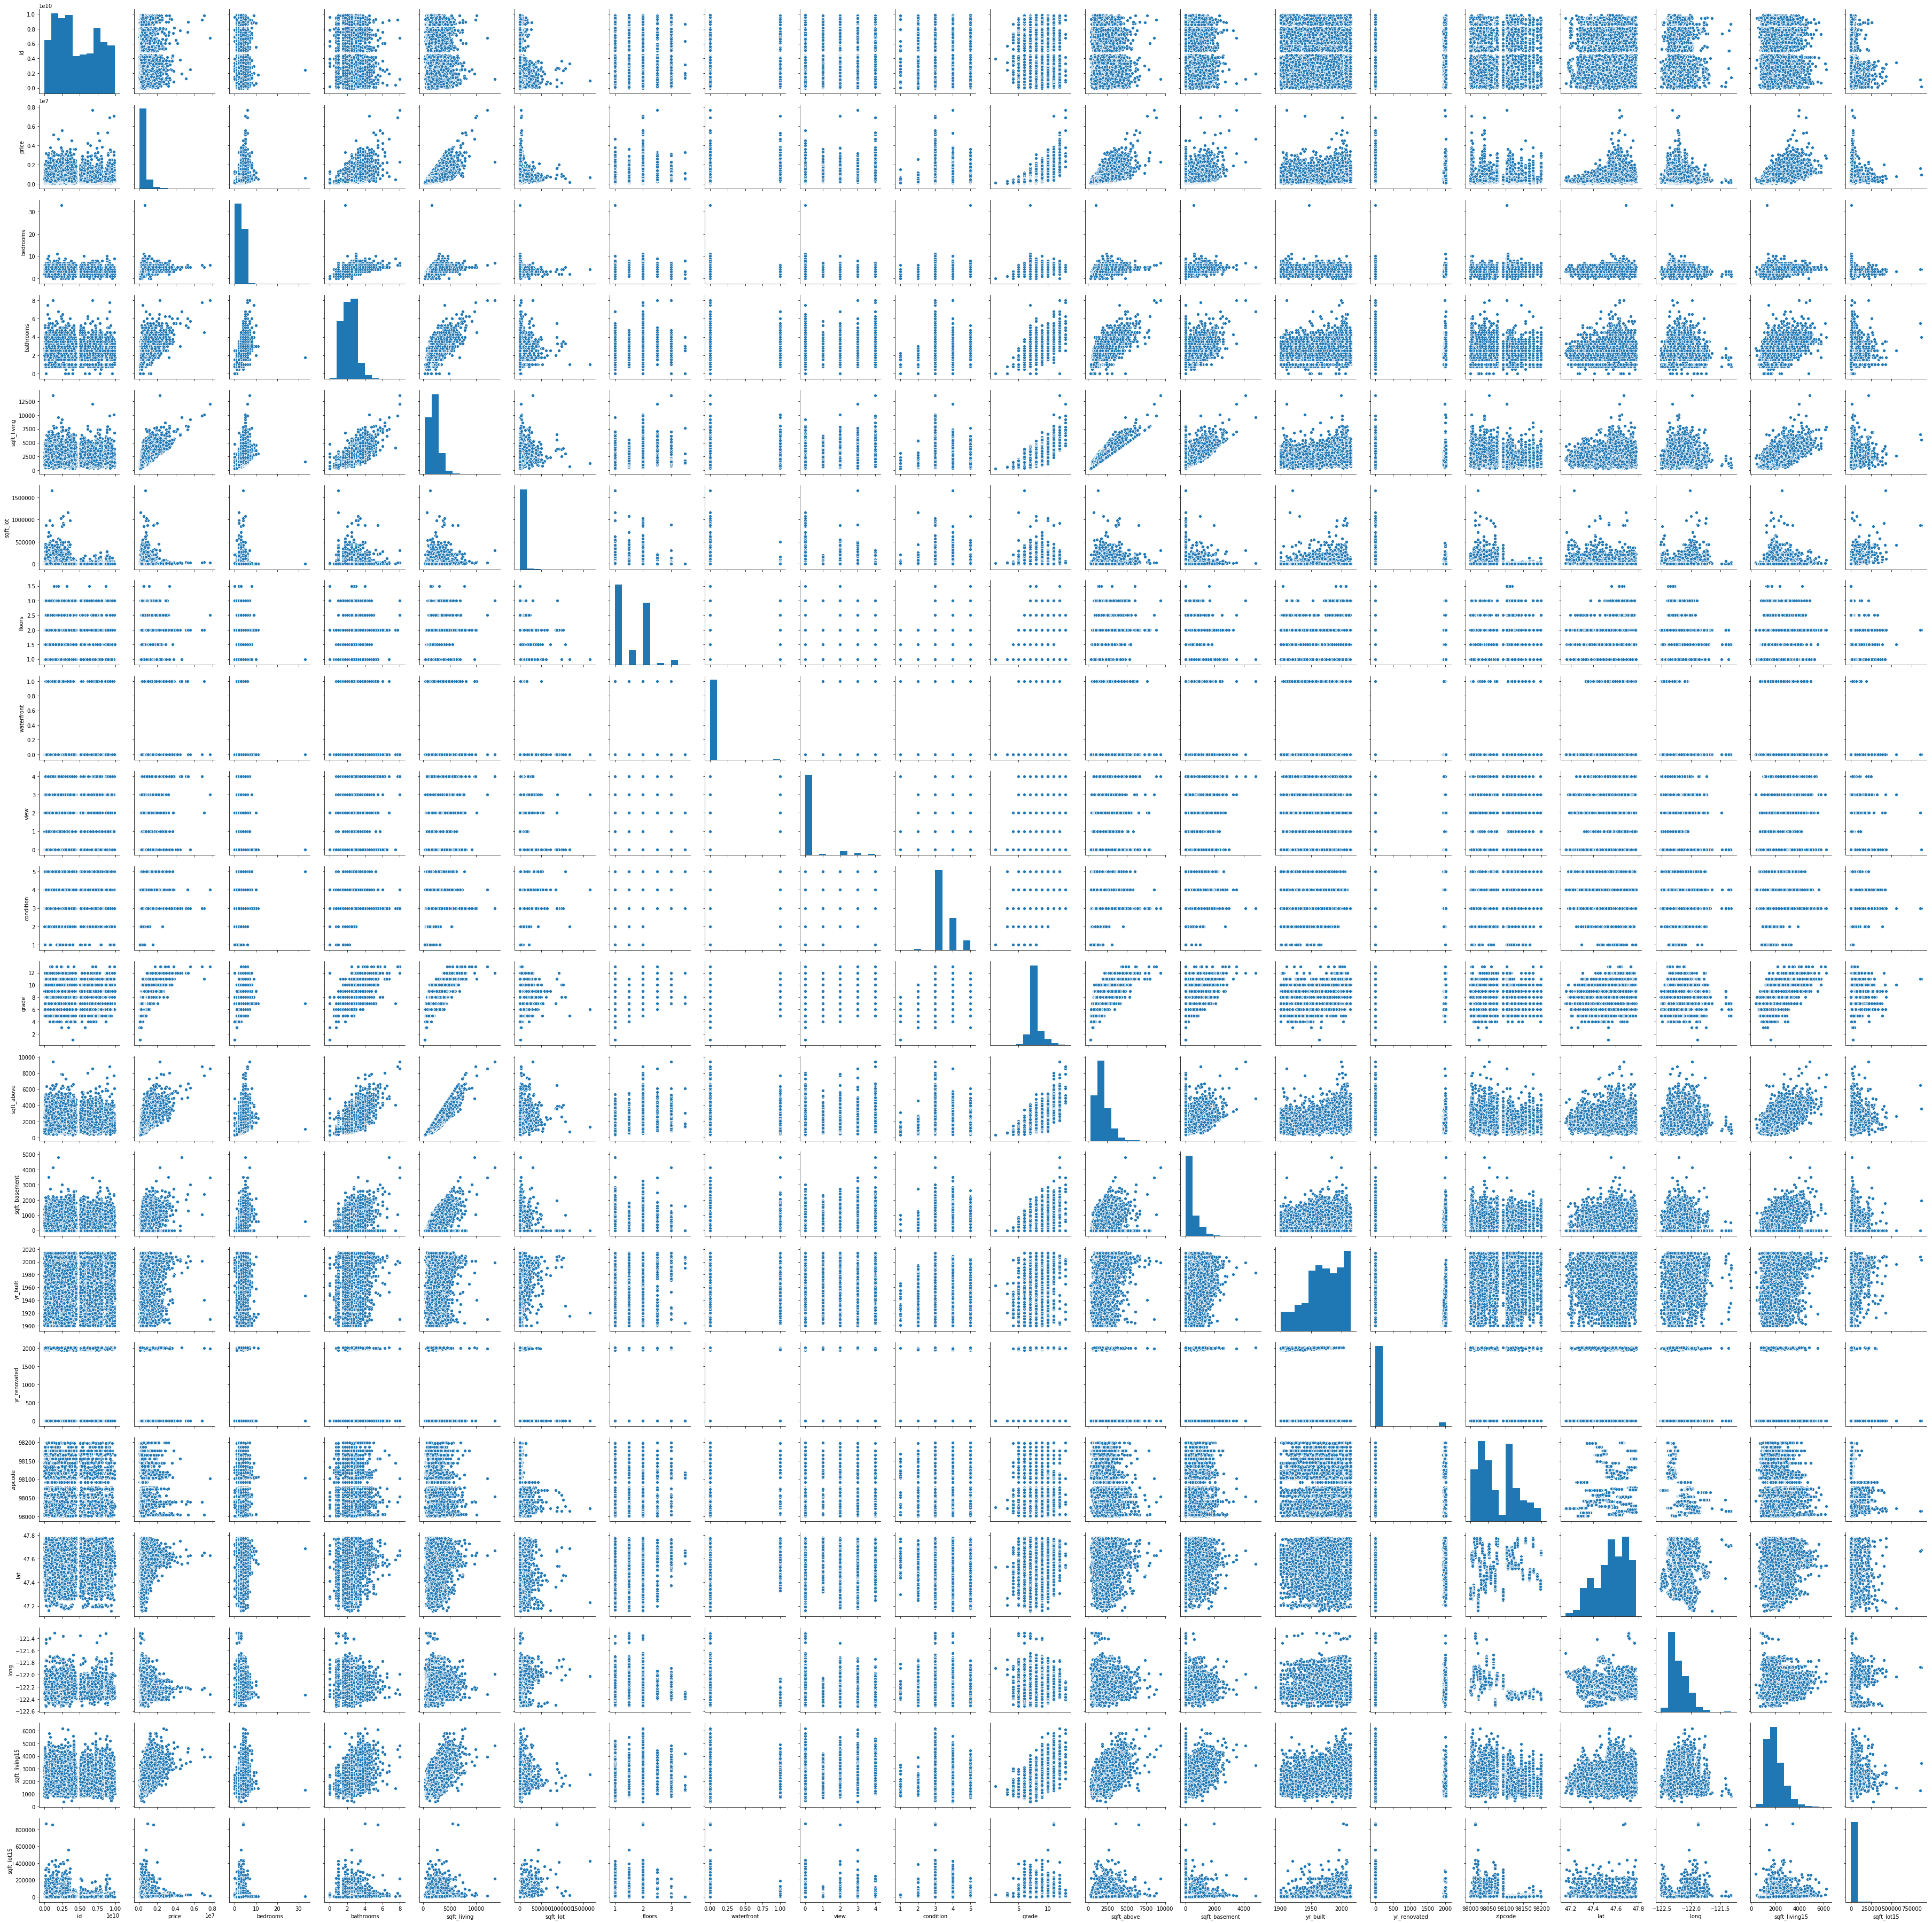

In [10]:
# Look for the correlation of the features.
sns.pairplot(housing.iloc[:,:])

As we see there is no corelation between the two features. So, there is no multicollinearlity problem between the features

In [11]:
import sklearn

In [17]:
# load the ordinary least square library from statsmodel
from statsmodels.api import OLS

In [18]:
housing.columns[3:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
cols = housing.columns[3:]

In [21]:
model = OLS(housing.price,housing[cols]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.211e+04
Date:                Sat, 22 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:16:58   Log-Likelihood:            -2.9461e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.551e+04   1888.716    -18.802      0.000   -3.92e+04   -3.18e+04
bathrooms      4.105e+04   3253.759     12.618      0.000    3.47e+04    4.74e+04
sqft_living     110.2642      2.268     48.607      0.000     105.818     114.711
sqft_lot          0.1334      0.048      2.786      0.005       0.040       0.227
floors         5261.5471   3541.347      1.486      0.137   -1679.755    1.22e+04
waterfront     5.833e+05   1.74e+04     33.598      0.000    5.49e+05    6.17e+05
view           5.236e+04   2128.298     24.600      0.000    4.82e+04    5.65e+04
condition      2.721e+04   2323.818     11.709      0.000    2.27e+04    3.18e+04
grade          9.548e+04   2145.492     44.503      0.000    9.13e+04    9.97e+04
sqft_above       71.3928      2.238     31.902      0.000      67.006      75.779
sqft_basement    38.8714      2.624     14.813      0.000      33.728      44.015
yr_built      -2561.7953     68.006    -37.670      0.000   -2695.092   -2428.498
yr_renovated     20.4187      3.646      5.600      0.000      13.272      27.566
zipcode        -519.0756     17.826    -29.119      0.000    -554.016    -484.136
lat            6.022e+05   1.07e+04     56.106      0.000    5.81e+05    6.23e+05
long          -2.179e+05   1.31e+04    -16.683      0.000   -2.44e+05   -1.92e+05
sqft_living15    23.0994      3.392      6.811      0.000      16.452      29.747
sqft_lot15       -0.3761      0.073     -5.137      0.000      -0.520      -0.233
==============================================================================
Omnibus:                    18403.146   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1873534.498
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      48.049   Cond. No.                     2.99e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
def back_elimination(dataset,output_var,col_list):
    while len(col_list)>0:
        model = OLS(output_var,dataset[col_list]).fit(disp=0)
        result = model
        large_pvalue = round(result.pvalues,3).nlargest(1)
        if large_pvalue[0]<0.05:
            return result
            break
        else:
            col_list = col_list.drop(large_pvalue.index)

In [28]:
result = back_elimination(housing,housing.price,cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Sat, 22 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:29:54   Log-Likelihood:            -2.9461e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21597   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.562e+04   1887.390    -18.872      0.000   -3.93e+04   -3.19e+04
bathrooms      4.234e+04   3136.467     13.500      0.000    3.62e+04    4.85e+04
sqft_living     109.9055      2.256     48.724      0.000     105.484     114.327
sqft_lot          0.1312      0.048      2.742      0.006       0.037       0.225
waterfront     5.833e+05   1.74e+04     33.600      0.000    5.49e+05    6.17e+05
view           5.249e+04   2126.373     24.686      0.000    4.83e+04    5.67e+04
condition      2.691e+04   2315.359     11.624      0.000    2.24e+04    3.15e+04
grade          9.581e+04   2133.801     44.903      0.000    9.16e+04       1e+05
sqft_above       72.5890      2.088     34.763      0.000      68.496      76.682
sqft_basement    37.3165      2.407     15.506      0.000      32.599      42.033
yr_built      -2544.6464     67.021    -37.968      0.000   -2676.013   -2413.280
yr_renovated     20.6412      3.643      5.666      0.000      13.500      27.782
zipcode        -521.7152     17.738    -29.413      0.000    -556.482    -486.948
lat            6.036e+05   1.07e+04     56.456      0.000    5.83e+05    6.25e+05
long          -2.192e+05    1.3e+04    -16.824      0.000   -2.45e+05   -1.94e+05
sqft_living15    22.3571      3.355      6.664      0.000      15.782      28.932
sqft_lot15       -0.3807      0.073     -5.204      0.000      -0.524      -0.237
==============================================================================
Omnibus:                    18359.519   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1857062.968
Skew:                           3.560   Prob(JB):                         0.00
Kurtosis:                      47.850   Cond. No.                     2.50e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.49e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
features = housing[['bedrooms','bathrooms','sqft_living','sqft_lot','waterfront','view','condition','view','grade','sqft_above','sqft_basement',
                   'yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']]
target = housing[['price']]

In [30]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3,random_state=1)

In [31]:
from sklearn.linear_model import LinearRegression
training_model = LinearRegression()
training_model.fit(features_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
target_predict = training_model.predict(features_test)
target_predict = np.array(np.round(target_predict,1))

In [33]:
# Load the r2_score and mean squared error 
from sklearn import metrics

In [38]:
print("Performance of the model :", metrics.r2_score(target_test,target_predict))
print("Mean squared error of the model :", math.sqrt(metrics.mean_squared_error(target_predict,target_test)))

Performance of the model : 0.6859787757748859
Mean squared error of the model : 221380.65194857237


In [58]:
output_dataframe = pd.DataFrame()
output_dataframe['actual_price'] = target_test['price']
output_dataframe['predict_price'] = target_predict

In [60]:
output_dataframe['error'] = output_dataframe['actual_price']-output_dataframe['predict_price']
output_dataframe.tail()

,actual_price,predict_price,error
14866,394500.0,564796.1,-170296.1
4903,259950.0,327849.9,-67899.9
16080,230000.0,325432.7,-95432.7
15668,1680000.0,2170329.8,-490329.8
18802,293000.0,757470.3,-464470.3
